In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
all_data          Naive Bayes        0.36            0.63            0.56            0.35            8.7187         


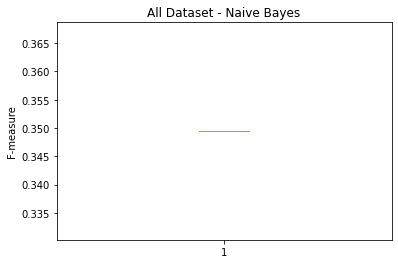

all_data          QDA                0.49            0.66            0.65            0.49            13.5911        


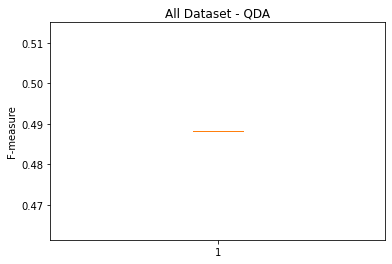

all_data          Random Forest      0.95            0.94            0.92            0.93            58.9516        


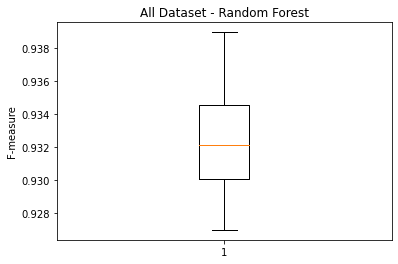

all_data          ID3                0.95            0.95            0.92            0.93            68.8729        


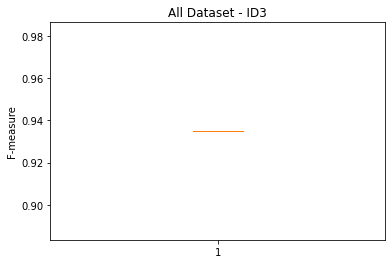

all_data          AdaBoost           0.95            0.94            0.93            0.93            763.6254       


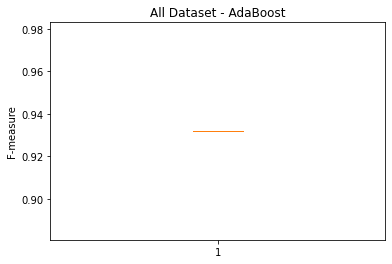

all_data          MLP                0.87            0.84            0.77            0.78            2456.56        


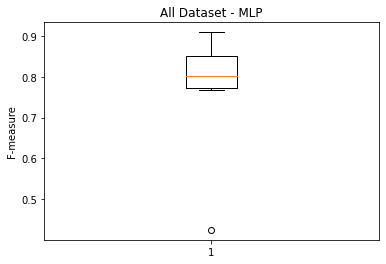

all_data          Nearest Neighbors  0.94            0.94            0.91            0.92            2144.2099      


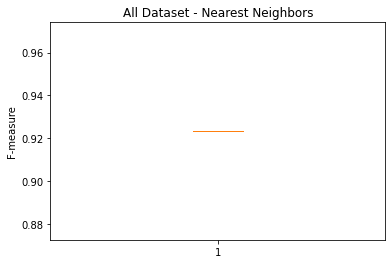

Mission accomplished!
Total operation time: =  55200.97506690025 seconds


In [3]:
from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import csv
import time
import warnings
import math

%matplotlib inline
warnings.filterwarnings("ignore")

result = "/content/drive/MyDrive/ISU/results/results_2.csv"
csv_files = ["all_data.csv"]
path = "/content/drive/MyDrive/ISU/"
repetition = 10


def folder(f_name):
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("The folder could not be created!")


folder_name = "/content/drive/MyDrive/ISU/results/"
folder(folder_name)
folder_name = "/content/drive/MyDrive/ISU/results/result_graph_2/"
folder(folder_name)

ml_list = {
    "Naive Bayes": GaussianNB(),
    "QDA": QDA(),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "ID3": DecisionTreeClassifier(max_depth=5, criterion="entropy"),
    "AdaBoost": AdaBoostClassifier(),
    "MLP": MLPClassifier(hidden_layer_sizes=(13, 13, 13, 13, 13), max_iter=500),
    "Nearest Neighbors": KNeighborsClassifier(3)}

features = {
    "all_data": ["Bwd Pkt Len Mean", "Flow Pkts/s", "Flow IAT Mean", "Flow IAT Min", "Flow Duration", "Bwd Pkt Len Std",
                 "Fwd IAT Tot", "Flow IAT Max", "Tot Fwd Pkts", "TotLen Fwd Pkts", "Fwd Pkt Len Max", "TotLen Bwd Pkts",
                 "Fwd Pkt Len Std", "Flow Byts/s", "Fwd Pkt Len Mean", "Label"]}

seconds = time.time()

with open(result, "w", newline="", encoding="utf-8") as f:
    wrt = csv.writer(f)
    wrt.writerow(["File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"])

for j in csv_files:
    print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (
        "File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"))
    feature_list = list(features[j[0:-4]])
    df = pd.read_csv(path + j, usecols=feature_list)
    df.fillna(0, inplace=True)
    df.replace([np.inf, -np.inf], -1, inplace=True)
    attack_or_not = []

    for i in df["Label"]:
        if i == "Benign":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)

    df["Label"] = attack_or_not
    y = df["Label"]
    del df["Label"]
    feature_list.remove('Label')
    X = df[feature_list]

    for ii in ml_list:
        precision = []
        recall = []
        f1 = []
        accuracy = []
        t_time = []

        for i in range(repetition):
            second = time.time()
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=repetition)
            clf = ml_list[ii]
            clf.fit(X_train, y_train)
            predict = clf.predict(X_test)
            f_1 = f1_score(y_test, predict, average='macro')
            pr = precision_score(y_test, predict, average='macro')
            rc = recall_score(y_test, predict, average='macro')
            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time() - second)))

        print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (
            j[0:-4], ii, str(round(np.mean(accuracy), 2)), str(round(np.mean(precision), 2)),
            str(round(np.mean(recall), 2)), str(round(np.mean(f1), 2)), str(round(np.mean(t_time), 4))))

        with open(result, "a", newline="", encoding="utf-8") as f:
            wrt = csv.writer(f)

            for i in range(0, len(t_time)):
                wrt.writerow([j[0:-4], ii, accuracy[i], precision[i], recall[i], f1[i], t_time[i]])

        plt.boxplot(f1)
        plt.title("All Dataset - " + str(ii))
        plt.ylabel('F-measure')
        plt.savefig(folder_name + j[0:-4] + str(ii) + ".pdf", bbox_inches='tight', papertype='a4',
                    orientation='portrait', format='pdf')
        plt.show()

print("Mission accomplished!")
print("Total operation time: = ", time.time() - seconds, "seconds")
